# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [82]:
# beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [83]:
# TODO - define X
X = beer[["calories","sodium","alcohol","cost"]]

What happened to y?

## Part 1: K-means clustering

In [84]:
# K-means with 3 clusters
from sklearn.cluster import KMeans

# TODO - initial k-means to 3 clusters, and fit it
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [85]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

In [86]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort('cluster')

/Users/MarcChan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


What do the clusters seem to be based on? Why?

In [87]:
# TODO - review the cluster centers. What's the command?
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

#Cluster centers for 3 centroids initialized
cluster_centers = km.cluster_centers_

#Cluster centers for 2 centroids initialized
cluster_centers_2 = km2.cluster_centers_

In [88]:
# TODO - calculate the mean of each feature for each cluster
# Group with 3 centroids initialized
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,102.75,10.0,4.075000,0.440000,1
2,70.00,10.5,2.600000,0.420000,1


In [89]:
# Group with 2 centroids initialized
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [90]:
# TODO - save the DataFrame above of cluster centers
centers = beer.groupby("cluster").mean().reset_index()

In [91]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [92]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

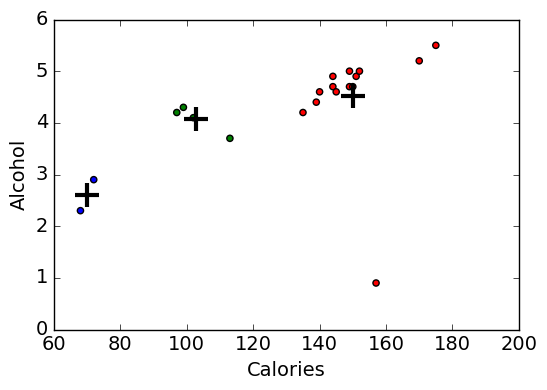

In [93]:
# TODO - scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
# hint: color in a plot is usually specified with c=array
# Hopefully plotting is becoming familiar to you now!
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])
# TODO - cluster centers, marked by "+"
# Just make sure you understand this command: 
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# TODO - always remember to add labels!
plt.xlabel("Calories")
plt.ylabel("Alcohol")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c3986a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cc9da90>]], dtype=object)

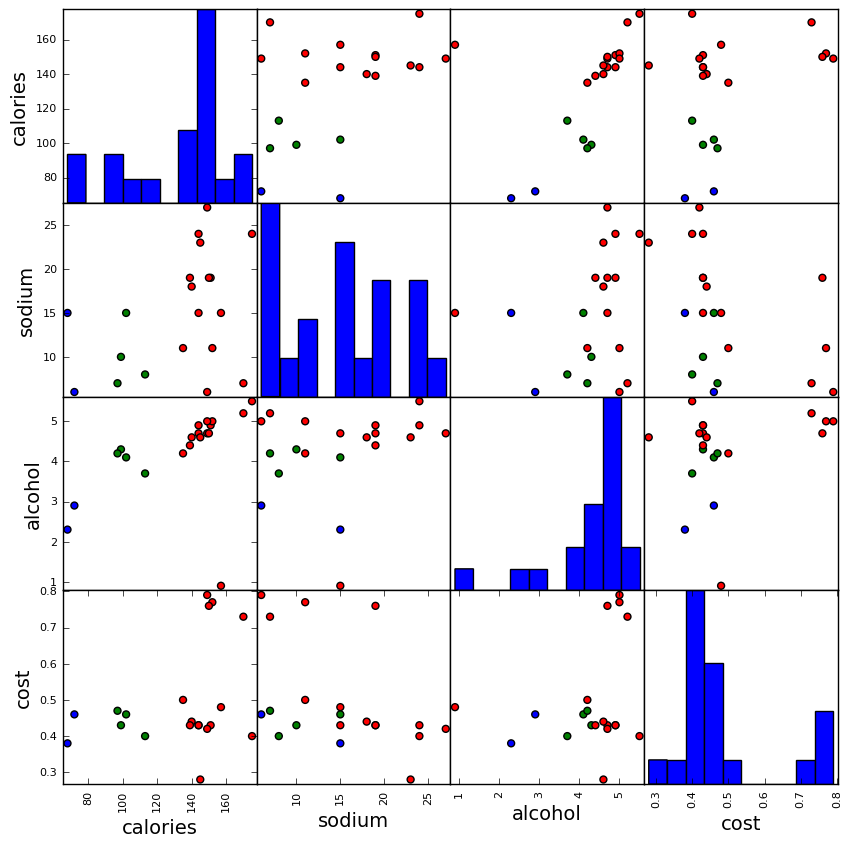

In [94]:
# TODO - scatter plot matrix (0=red, 1=green, 2=blue)
# Scatterplot matrix with 3 centroids initialized
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd21780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d93da90>]], dtype=object)

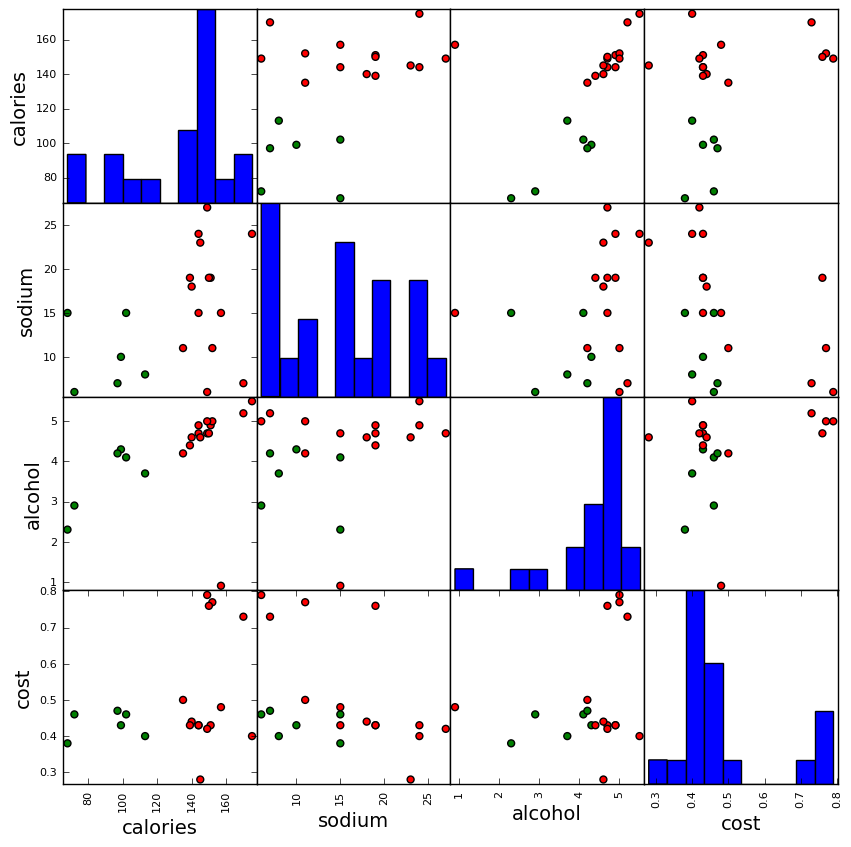

In [95]:
# Scatterplot matrix with 2 centroids initialized
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))

### Repeat with scaled data

In [96]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [97]:
# TODO - repeat K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3).fit(X_scaled)


In [98]:
# TODO - save the cluster labels and sort by cluster
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
14,Kirin,149,6,5.0,0.79,0,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0,0
4,Heineken,152,11,5.0,0.77,0,0,0
13,Becks,150,19,4.7,0.76,0,0,0
9,Budweiser_Light,113,8,3.7,0.40,1,1,1
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,1
12,Michelob_Light,135,11,4.2,0.50,0,0,1
11,Coors_Light,102,15,4.1,0.46,1,1,1
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,1
19,Schlitz_Light,97,7,4.2,0.47,1,1,1


What are the "characteristics" of each cluster?

In [99]:
# TODO - review the cluster centers
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,155.250,10.750,4.9750,0.7625,0.0,0.00
1,105.375,10.875,3.3250,0.4475,1.0,0.75
2,148.375,21.125,4.7875,0.4075,0.0,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c329c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e499710>]], dtype=object)

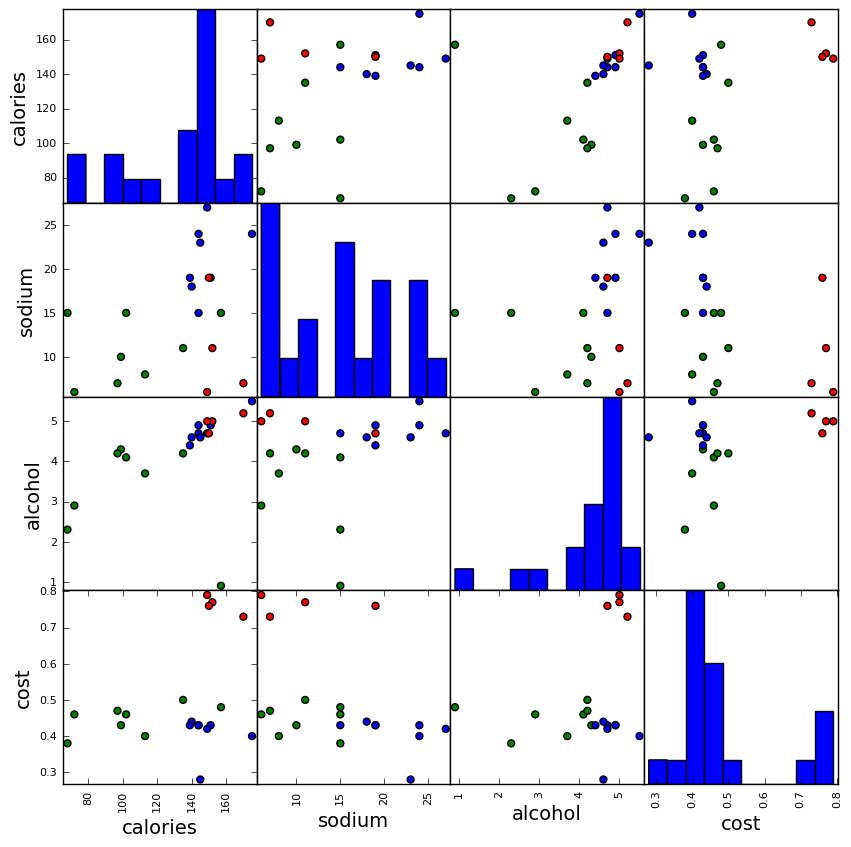

In [100]:
# TODO - scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [101]:
# TODO - calculate SC for our model
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.179780680894 0.673177504646


In [102]:
# TODO - calculate SC for K=2 through K=19
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

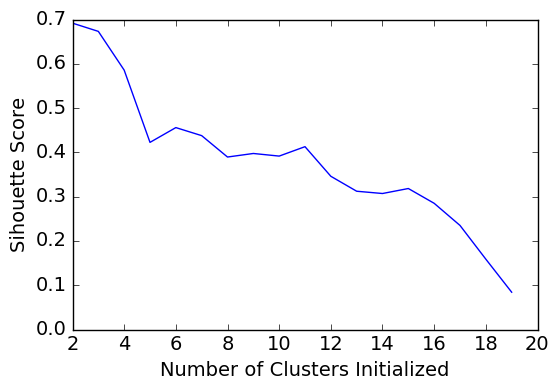

In [103]:
# TODO - plot the results (SC vs k)
# Don't forget to label!
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

## Part 3: DBSCAN clustering

In [278]:
# TODO - DBSCAN with eps=1 and min_samples=3

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [279]:
# TODO - review the cluster labels
labels = db.labels_

In [280]:
# save the cluster labels and sort by cluster
beer['cluster_db'] = labels
beer.sort('cluster_db')

/Users/MarcChan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,1,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,0,0,-1
6,Augsberger,175,24,5.5,0.40,0,0,2,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,2,0
16,Hamms,139,19,4.4,0.43,0,0,2,0
14,Kirin,149,6,5.0,0.79,0,0,0,0
13,Becks,150,19,4.7,0.76,0,0,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0,1,0
10,Coors,140,18,4.6,0.44,0,0,2,0
0,Budweiser,144,15,4.7,0.43,0,0,2,0


In [281]:
# review the cluster centers
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.333333,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,0.000000,1.333333
1,99.333333,10.666667,4.200000,0.453333,1.000000,1.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f007198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1305a3c18>]], dtype=object)

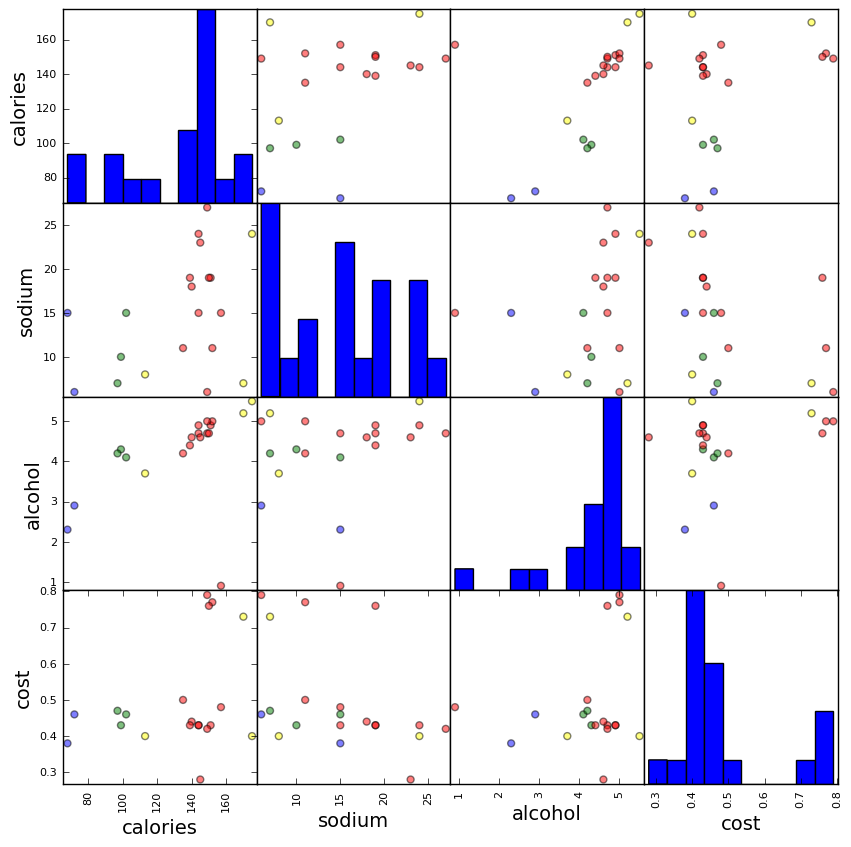

In [282]:
# TODO - scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)